In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# bring in csv files, show farmers market data
farmers_markets = pd.read_csv("clean_farm.csv")
start_up = pd.read_csv("Best Cities for Startups.csv")
farmers_markets.fillna("N/A", axis=0, inplace=True)
farmers_markets

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,California,1005272,Adelanto Stadium Farmers Market,N/A,N/A,N/A,N/A,N/A,Hwy 395 & Rancho Drive,Victorville,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2009
1,California,1009019,Alameda Farmers' Market,http://www.pcfma.com,https://www.facebook.com/AlamedaFarmersMarket,N/A,N/A,N/A,Haight and Webster St.,Alameda,...,N,N,Y,N,N,N,N,N,N,6/27/2016 12:57
2,California,1008835,Alisal Certified Farmers' Market,http://www.everyonesharvest.org,https://www.facebook.com/EveryonesHarvest,N/A,N/A,N/A,632 East Alisal Street,Salinas,...,N,N,Y,N,N,N,N,N,N,6/27/2016 15:24
3,California,1009998,Altadena Farmers' Market,http://www.altadenafarmersmarket.com,https://www.facebook.com/AltadenaFarmersMarket,https://twitter.com/AltadenaFM,N/A,http://altadenafm.tumblr.com,600 W. Palm Street,Altadena,...,Y,N,Y,Y,Y,Y,N,N,N,4/22/2014 13:29
4,California,1011421,Alum Rock Village Farmers' Market,http://www.pcfma.org,www.facebook.com/AlumRockVillageFarmersMarket,www.twitter.com/PacCoastFarmers,N/A,N/A,57 North White Road,San Jose,...,Y,N,Y,N,N,N,N,N,N,7/20/2015 12:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Massachusetts,1006893,Woburn Farmers Market,http://www.woburnfarmersmarket.com,https://www.facebook.com/woburnfarmersmarket?r...,N/A,N/A,www.tinyurl.com/spencefarm,41 Wyman Street,Woburn,...,N,N,Y,N,N,N,N,N,N,7/27/2013 9:49
1931,Massachusetts,1008931,Woburn Indoor Farmers Market,http://www.woburnfarmersmarket.com,https://www.facebook.com/woburnfarmersmarket?r...,N/A,N/A,www.tinyurl.com/spencefarm,41 Wyman Street,Woburn,...,N,N,Y,N,N,N,N,N,N,7/27/2013 10:05
1932,Massachusetts,1007624,Worcester Northeast Side Farmers Market,N/A,N/A,N/A,N/A,N/A,"Salem Covenant Church, 215 East Mountain Street",Worcester,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2009
1933,Massachusetts,1002569,Worcester/Main South,N/A,N/A,N/A,N/A,N/A,766 Main Street,Worcester,...,N,N,N,N,N,N,N,N,N,5/24/2012 16:06


In [5]:
# clean up city names, drop South San Francisco values
farmers_markets.loc[farmers_markets['city'].str.contains('New York', case=False), 'city'] = 'New York'
farmers_markets.loc[farmers_markets['city'].str.contains('Boston', case=False), 'city'] = 'Boston'
farmers_markets.loc[farmers_markets['city'].str.contains('Los Angeles', case=False), 'city'] = 'Los Angeles'
farmers_markets.loc[farmers_markets['city'].str.contains('Seattle', case=False), 'city'] = 'Seattle'
farmers_markets = farmers_markets[farmers_markets['city'].str.contains("South San Francisco")==False]
farmers_markets

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,California,1005272,Adelanto Stadium Farmers Market,N/A,N/A,N/A,N/A,N/A,Hwy 395 & Rancho Drive,Victorville,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2009
1,California,1009019,Alameda Farmers' Market,http://www.pcfma.com,https://www.facebook.com/AlamedaFarmersMarket,N/A,N/A,N/A,Haight and Webster St.,Alameda,...,N,N,Y,N,N,N,N,N,N,6/27/2016 12:57
2,California,1008835,Alisal Certified Farmers' Market,http://www.everyonesharvest.org,https://www.facebook.com/EveryonesHarvest,N/A,N/A,N/A,632 East Alisal Street,Salinas,...,N,N,Y,N,N,N,N,N,N,6/27/2016 15:24
3,California,1009998,Altadena Farmers' Market,http://www.altadenafarmersmarket.com,https://www.facebook.com/AltadenaFarmersMarket,https://twitter.com/AltadenaFM,N/A,http://altadenafm.tumblr.com,600 W. Palm Street,Altadena,...,Y,N,Y,Y,Y,Y,N,N,N,4/22/2014 13:29
4,California,1011421,Alum Rock Village Farmers' Market,http://www.pcfma.org,www.facebook.com/AlumRockVillageFarmersMarket,www.twitter.com/PacCoastFarmers,N/A,N/A,57 North White Road,San Jose,...,Y,N,Y,N,N,N,N,N,N,7/20/2015 12:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Massachusetts,1006893,Woburn Farmers Market,http://www.woburnfarmersmarket.com,https://www.facebook.com/woburnfarmersmarket?r...,N/A,N/A,www.tinyurl.com/spencefarm,41 Wyman Street,Woburn,...,N,N,Y,N,N,N,N,N,N,7/27/2013 9:49
1931,Massachusetts,1008931,Woburn Indoor Farmers Market,http://www.woburnfarmersmarket.com,https://www.facebook.com/woburnfarmersmarket?r...,N/A,N/A,www.tinyurl.com/spencefarm,41 Wyman Street,Woburn,...,N,N,Y,N,N,N,N,N,N,7/27/2013 10:05
1932,Massachusetts,1007624,Worcester Northeast Side Farmers Market,N/A,N/A,N/A,N/A,N/A,"Salem Covenant Church, 215 East Mountain Street",Worcester,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2009
1933,Massachusetts,1002569,Worcester/Main South,N/A,N/A,N/A,N/A,N/A,766 Main Street,Worcester,...,N,N,N,N,N,N,N,N,N,5/24/2012 16:06


In [6]:
# filter to top five cities
top_five_cities = ["San Francisco", "New York", "Los Angeles", "Boston", "Seattle"]
top_five_cities_df = farmers_markets[farmers_markets["city"].isin(top_five_cities)]
top_five_cities_df



,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
20,California,1010003,Atwater Village Farmers' Market,http://www.seela.org/atwater-village-farmers-m...,https://www.facebook.com/pages/Atwater-Village...,https://twitter.com/AtwaterFM,N/A,www.instagram.com/atwatervillagefm,3250 Glendale Blvd,Los Angeles,...,Y,Y,Y,Y,Y,Y,N,Y,Y,8/7/2014 16:26
71,California,1005208,Central Ave Farmers Market,http://www.farmernet.com,N/A,N/A,N/A,N/A,4301 Central Ave at 43rd st,Los Angeles,...,N,N,N,N,N,N,N,N,N,1/14/2012 18:37
95,California,1012527,Clement St. Farmers Market,http://www.agriculturalinstitute.org,https://www.facebook.com/ClementStreetFarmersM...,N/A,N/A,N/A,Clement St. between 2nd and 4th,San Francisco,...,Y,Y,Y,Y,Y,Y,N,N,N,7/13/2016 12:38
122,California,1001714,Crenshaw Farmers' Market,http://www.seela.org,https://www.facebook.com/pages/Crenshaw-Farmer...,N/A,N/A,N/A,3650 Crenshaw Blvd.,Los Angeles,...,N,N,N,N,N,N,N,N,N,6/13/2013 17:22
141,California,1006582,Divisidero Certified Farmers' Market,http://www.pcfma.com/market_home.php?market_id=63,N/A,N/A,N/A,N/A,1326 Grove St.,San Francisco,...,N,N,N,N,N,N,N,N,N,6/13/2012 13:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,Massachusetts,1012476,Copley Square Farmers Market,http://www.massfarmersmarkets.org,www.facebook.com/CopleySquareFarmersMarket,@MAFarmMarkets,N/A,N/A,N/A,Boston,...,Y,N,Y,Y,N,Y,N,N,Y,7/12/2016 11:42
1688,Massachusetts,1012167,Dewey Square Farmers Market,https://bostonpublicmarket.org/,https://www.facebook.com/BostonPublicMarket,BosPublicMarket,N/A,Instagram - @BostonPublicMarket,600 Atlantic Ave,Boston,...,N,N,Y,N,N,Y,N,N,N,7/1/2016 9:07
1696,Massachusetts,1012407,East Boston Farmers Market,http://www.ebnhc.org/en/food-access/farmers-ma...,https://www.facebook.com/EastBostonFarmersMark...,N/A,N/A,instagram.com/eastbostonfarmersmarket,Across from 201 Border St.,Boston,...,Y,Y,Y,N,Y,N,N,N,N,8/6/2018 10:03
1870,Massachusetts,1012103,SOUTH BOSTON FARMER'S MARKET,http://sbndc.org/south-boston-farmers-market/,https://www.facebook.com/South-Boston-Farmers-...,@SBFarmersMkt_,N/A,N/A,446 West Broadway,Boston,...,N,N,Y,N,N,N,N,N,N,6/29/2016 13:10


In [7]:
# get count of number of farmers markets per city
markets_per_city = top_five_cities_df['city'].value_counts()
markets_per_city

New York         66
Los Angeles      36
San Francisco    20
Seattle          18
Boston           12
Name: city, dtype: int64

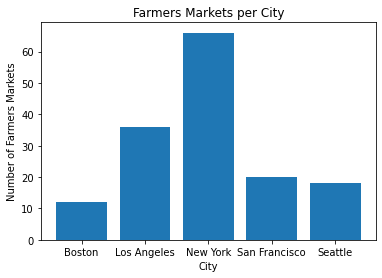

In [14]:
# create bar chart to visualize data
markets_per_city.to_dict()
List = markets_per_city.items()
List = sorted(List) 
x, y = zip(*List) 
plt.xlabel('City')
plt.ylabel('Number of Farmers Markets')
plt.title('Farmers Markets per City')
plt.bar(x, y)
plt.savefig('Farmers Markets Per City')
plt.show()

In [12]:
# create dataframe for cities in the US
start_up_cities = start_up.loc[start_up['country'].str.contains("United States")]
start_up_cities = start_up_cities.head()
start_up_cities.loc[start_up_cities['city'].str.contains('San Francisco'), 'city'] = 'San Francisco'
start_up_cities.loc[start_up_cities['city'].str.contains('Los Angeles'), 'city'] = 'Los Angeles'
start_up_cities.loc[start_up_cities['city'].str.contains('Boston'), 'city'] = 'Boston'
start_up_cities

,position,change in position from 2020,city,country,total score,quatity score,quality score,business score,sign of change in position
0,1,0,San Francisco,United States,328.966,29.14,296.02,3.8,NaN
1,2,0,New York,United States,110.777,11.43,95.55,3.8,NaN
3,4,1,Los Angeles,United States,58.441,11.23,43.41,3.8,+
5,6,2,Boston,United States,49.835,5.50,40.53,3.8,-
11,12,1,Seattle,United States,24.329,3.49,17.04,3.8,-
